In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data-export (1).csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ['Channel group','DateHour','Users','Sessions','Engaged Sessions','Average engagement time per session','Engaged session per user','Events per session','Engagement rate','Event count']
df.head()

,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged session per user             3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [6]:
df['DateHour'] = pd.to_datetime(df['DateHour'],format="%Y%m%d%H",errors='coerce')
numeric_cols = df.columns.drop(['Channel group','DateHour'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df['Hour'] = df['DateHour'].dt.hour
df.head()

,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [7]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [8]:
sns.set(style='whitegrid')


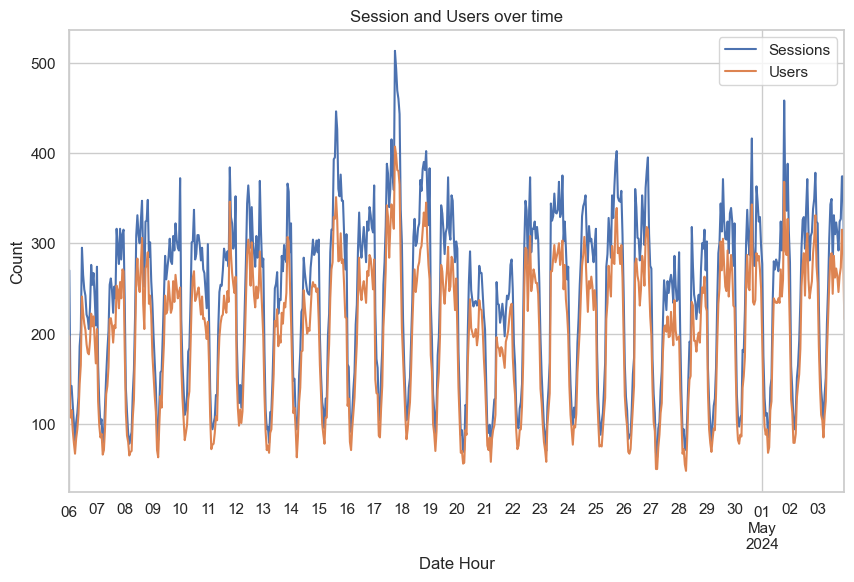

In [9]:
plt.figure(figsize=(10,6))
df.groupby("DateHour")[['Sessions','Users']].sum().plot(ax=plt.gca())
plt.title('Session and Users over time')
plt.xlabel('Date Hour')
plt.ylabel('Count')
plt.show()

C:\Users\Soham Chouhan\AppData\Local\Temp\ipykernel_10492\3133133093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Channel group'],y=df['Users'],estimator=np.sum,palette='viridis')


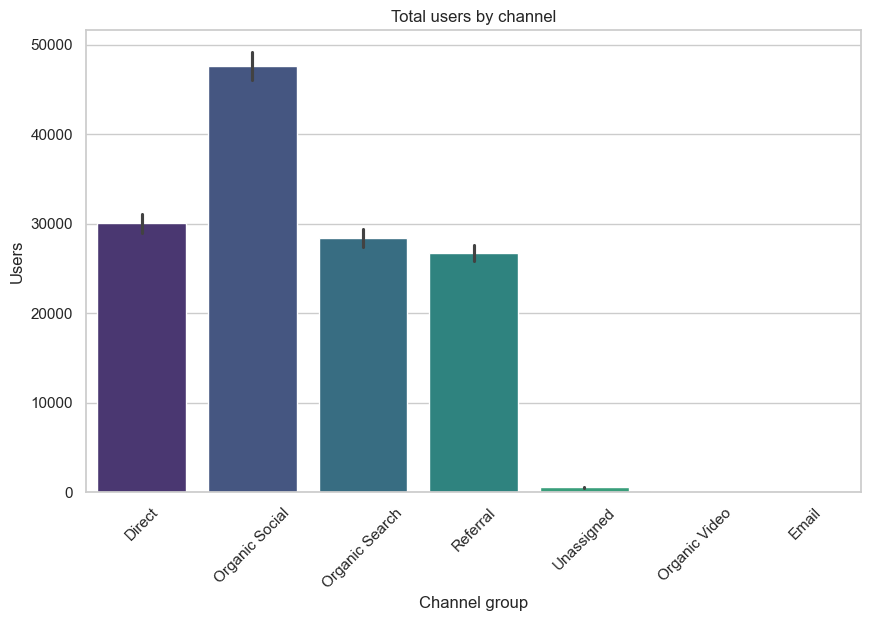

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Channel group'],y=df['Users'],estimator=np.sum,palette='viridis')
plt.title('Total users by channel')
plt.xticks(rotation=45)
plt.show()

C:\Users\Soham Chouhan\AppData\Local\Temp\ipykernel_10492\2255350879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Channel group'],y=df['Average engagement time per session'],estimator=np.mean,palette='magma')


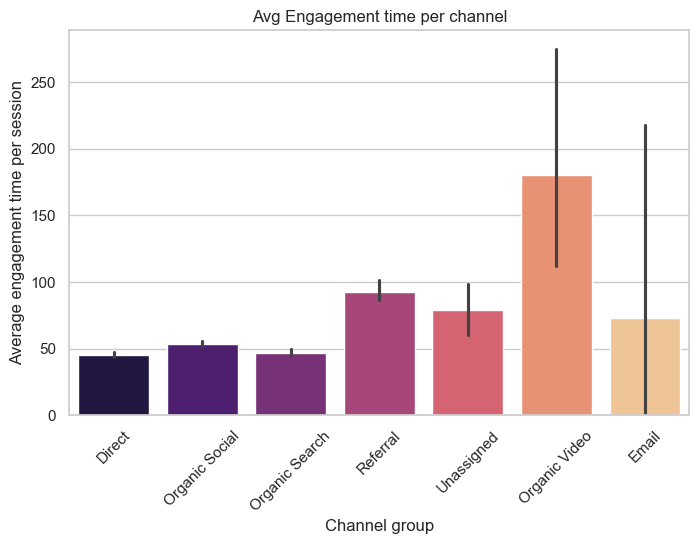

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Channel group'],y=df['Average engagement time per session'],estimator=np.mean,palette='magma')
plt.title('Avg Engagement time per channel')
plt.xticks(rotation=45)
plt.show()

C:\Users\Soham Chouhan\AppData\Local\Temp\ipykernel_10492\829088818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Channel group',y='Engagement rate',palette='coolwarm')


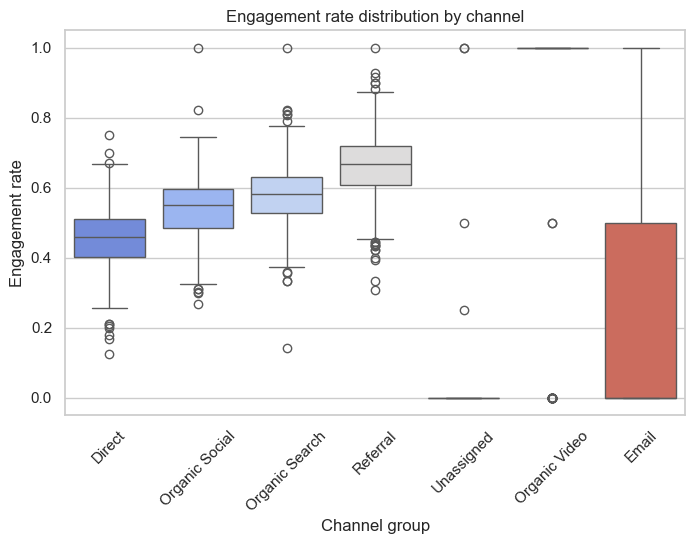

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Channel group',y='Engagement rate',palette='coolwarm')
plt.title('Engagement rate distribution by channel')
plt.xticks(rotation=45)
plt.show()

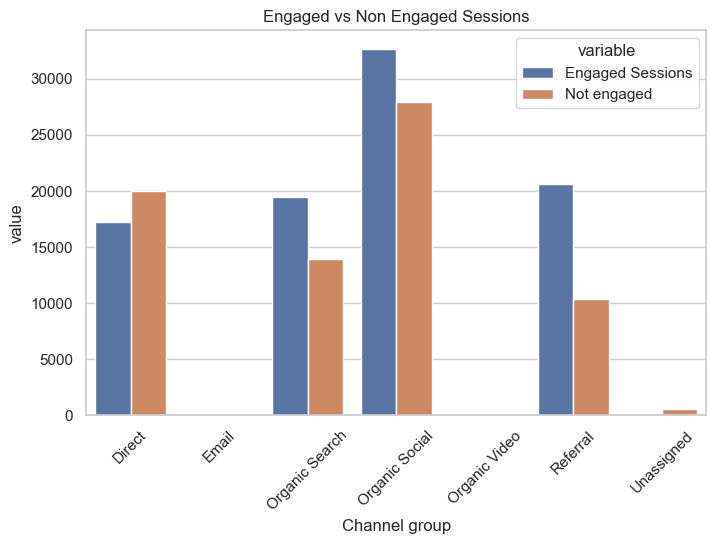

In [13]:
session_df = df.groupby('Channel group',)[['Sessions','Engaged Sessions']].sum().reset_index()
session_df['Not engaged'] = session_df['Sessions'] - session_df['Engaged Sessions']
session_df_melted = session_df.melt(id_vars='Channel group', value_vars=['Engaged Sessions','Not engaged'])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted,x='Channel group',y='value',hue='variable')
plt.title('Engaged vs Non Engaged Sessions')
plt.xticks(rotation=45)
plt.show()

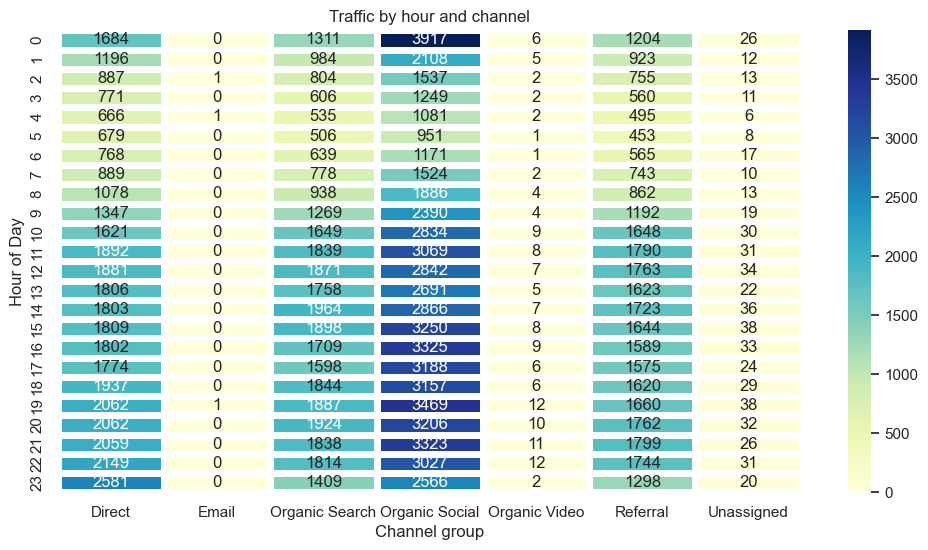

In [14]:
heatmap_data = df.groupby(['Hour','Channel group'])['Sessions'].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,cmap='YlGnBu',linewidths=5, annot=True, fmt='.0f')
plt.title('Traffic by hour and channel')
plt.xlabel('Channel group')
plt.ylabel('Hour of Day')
plt.show()

In [15]:
target_candidates = ["Engagement rate", "Sessions", "Engaged session per user", "Average engagement time per session"]
correlations = df.corr(numeric_only=True)[target_candidates]

print(correlations.sort_values(by="Engagement rate", ascending=False))

                                     Engagement rate  Sessions  \
Engagement rate                             1.000000  0.303394   
Engaged session per user                    0.960417  0.356012   
Engaged Sessions                            0.425977  0.956897   
Event count                                 0.358797  0.952865   
Users                                       0.341180  0.988925   
Events per session                          0.309156  0.028083   
Sessions                                    0.303394  1.000000   
Average engagement time per session         0.111666 -0.094713   
Hour                                        0.000479  0.290404   

                                     Engaged session per user  \
Engagement rate                                      0.960417   
Engaged session per user                             1.000000   
Engaged Sessions                                     0.451020   
Event count                                          0.394519   
Users         

In [16]:
df.sample(10)

,Channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count,Hour
136,Organic Social,2024-04-15 12:00:00,96,103,57,41.106796,0.593750,4.747573,0.553398,489,12
1036,Organic Search,2024-04-13 17:00:00,54,67,36,40.955224,0.666667,3.850746,0.537313,258,17
790,Referral,2024-04-08 20:00:00,60,70,42,51.614286,0.700000,4.728571,0.600000,331,20
2307,Direct,2024-04-14 04:00:00,21,22,11,35.772727,0.523810,3.863636,0.500000,85,4
2649,Referral,2024-04-11 03:00:00,11,15,6,91.733333,0.545455,5.400000,0.400000,81,3
624,Organic Search,2024-04-09 13:00:00,65,78,45,97.435897,0.692308,3.871795,0.576923,302,13
2601,Direct,2024-04-07 03:00:00,13,16,6,20.125000,0.461538,4.187500,0.375000,67,3
1514,Organic Search,2024-04-06 15:00:00,43,53,35,76.415094,0.813953,4.301887,0.660377,228,15
3029,Unassigned,2024-04-16 23:00:00,1,1,0,0.000000,0.000000,1.000000,0.000000,1,23
2261,Referral,2024-04-17 01:00:00,23,29,20,84.034483,0.869565,5.137931,0.689655,149,1


In [17]:
df['Channel group'].nunique()

7

C:\Users\Soham Chouhan\AppData\Local\Temp\ipykernel_10492\352982975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Channel group'],y=df['Engagement rate'],palette='Blues')


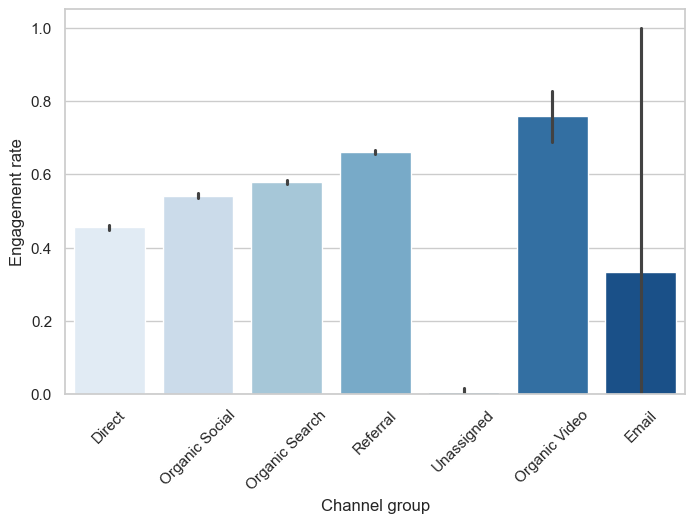

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Channel group'],y=df['Engagement rate'],palette='Blues')
plt.xticks(rotation=45)
plt.show()

In [19]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Unassigned','Email','Direct','Organic Social','Organic Search','Referral','Organic Video']])
df['Channel group'] = oe.fit_transform(df[['Channel group']])

In [20]:
df = df.drop(columns=['DateHour'])

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df), columns=df.columns, index=df.index)

In [22]:
df_scaled.sample(10)

,Channel group,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count,Hour
616,-0.736885,0.779783,0.970017,0.613853,0.235516,0.092126,0.021348,-0.140824,0.920375,-1.714743
2811,-1.971949,-1.350207,-1.332623,-1.371877,-0.244885,-2.297320,-0.957485,-2.206233,-1.292071,-0.262437
1362,-0.736885,0.137405,0.184410,0.032664,0.043871,0.090859,0.307184,-0.014885,0.426913,0.608946
1159,-0.736885,0.306452,0.265680,0.226393,-0.025563,0.153834,0.145270,0.164734,0.367263,1.189868
2087,-0.736885,-0.504973,-0.492837,-0.693823,-0.326968,-0.333096,0.170155,-0.346907,-0.391909,-1.133821
2121,-0.736885,-0.538782,-0.465747,-0.839120,-0.343170,-0.694643,-0.431296,-0.788302,-0.673887,-1.279051
532,-0.119353,0.915020,0.726208,0.904447,-0.246296,0.283012,0.216862,0.434623,0.920375,0.899407
1917,0.498179,-0.335926,-0.249028,-0.306363,-0.401767,0.307031,-0.369657,0.089465,-0.484094,-1.714743
2201,-0.736885,-0.606401,-0.519926,-0.790688,-0.366021,-0.403247,-0.431954,-0.562722,-0.711846,-0.843360
2269,-0.736885,-0.674020,-0.628286,-0.742255,-0.079484,-0.058870,-0.101300,-0.171410,-0.646774,-0.988590


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_scaled.iloc[:,:],df_scaled.iloc[:,7],test_size=0.2,random_state=42)

In [24]:
x_train = x_train.drop(columns=['Engagement rate'])
x_test = x_test.drop(columns=['Engagement rate'])

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print('LR MSE : ',mean_squared_error(y_test,y_pred_lr))
print('LR R2 : ',r2_score(y_test,y_pred_lr))

LR MSE :  0.0576522725834841
LR R2 :  0.9414688767396725


In [27]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth= 7, max_leaf_nodes=None, min_samples_leaf = 1, min_samples_split =10)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print('DT MSE : ',mean_squared_error(y_test,y_pred_dt))
print('DT R2 : ',r2_score(y_test,y_pred_dt))

DT MSE :  0.04572162838202024
DT R2 :  0.9535813915641278


In [28]:
# from sklearn.model_selection import GridSearchCV
# param_dt = {
#     'max_depth': [1, 4, 7, 10],
#     'min_samples_split': [2, 6, 10],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'max_leaf_nodes': [None, 10, 40, 80, 100]
# }
# grid_dt = GridSearchCV(dt, param_dt, cv=5, error_score='raise')
# grid_dt.fit(x_train, y_train)
# print('Best DT Parameters:', grid_dt.best_params_)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print('RF MSE : ',mean_squared_error(y_test,y_pred_rf))
print('RF R2 : ',r2_score(y_test,y_pred_rf))

RF MSE :  0.03438227518633518
RF R2 :  0.9650936017485215


In [30]:
# param_rf = {
#     'n_estimators': [100, 200],             
#     'max_depth': [None, 5, 10, 20],          
#     'min_samples_split': [2, 5, 10],         
#     'min_samples_leaf': [1, 2, 4],           
# }
# grid_rf = GridSearchCV(estimator=rf,
#                        param_grid=param_rf,
#                        cv=5,                
#                        n_jobs=-1,           
#                        scoring='neg_mean_squared_error',
#                        error_score='raise',
#                        verbose=1)
# grid_rf.fit(x_train, y_train)
# print('Best RF Parameters:', grid_rf.best_params_)

In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=0.8,random_state=42, verbosity=0)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
print('XGB MSE : ',mean_squared_error(y_test,y_pred_xgb))
print('XGB R2 : ',r2_score(y_test,y_pred_xgb))

XGB MSE :  0.011351018840537344
XGB R2 :  0.9884759463397784


In [32]:
# param_grid = {
#     'n_estimators': [100, 200],          
#     'learning_rate': [0.01, 0.1, 0.3],   
#     'max_depth': [3, 5, 7],              
#     'subsample': [0.8, 1.0],            
#     'colsample_bytree': [0.8, 1.0],      
#     'gamma': [0, 1],                     
#     'reg_lambda': [0, 1],                
#     'reg_alpha': [0, 1]                  
# }
# grid_xgb = GridSearchCV(estimator=xgb,
#                         param_grid=param_grid,
#                         cv=5,
#                         n_jobs=-1,
#                         scoring='neg_mean_squared_error',
#                         verbose=1,
#                         error_score='raise')
# grid_xgb.fit(x_train, y_train)
# best_xgb = grid_xgb.best_estimator_
# y_pred_xgb = best_xgb.predict(x_test)
# print("Best Parameters:", grid_xgb.best_params_)

In [33]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

In [34]:
import kerastuner as kt
def build_model(hp):
    model = Sequential()
    units = hp.Int('units',min_value=8,max_value=512,step=32)
    model.add(Dense(units=units,activation='relu',input_dim=x_train.shape[1]))
    for i in range(hp.Int('num_layers',min_value=1,max_value=5)):
        model.add(Dense(units=units,activation='relu'))    
        model.add(Dense(1,activation='linear'))
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
    return model
tuner = kt.RandomSearch(build_model,objective='val_mean_squared_error',max_trials=5,overwrite=True,directory='tuner_dir',project_name='regression_model')
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
tuner.search(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=[early_stop],verbose=1)
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Trial 5 Complete [00h 00m 16s]
val_mean_squared_error: 0.011242295615375042

Best val_mean_squared_error So Far: 0.010753223672509193
Total elapsed time: 00h 01m 04s


C:\Users\Soham Chouhan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Soham Chouhan\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 360)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 360)            │       129,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           361 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 360)            │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           361 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 360)            │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           361 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 360)            │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           361 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,164 (535.80 KB)

 Trainable params: 137,164 (535.80 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
class R2Callback(Callback):
    def __init__(self, x_val, y_val):
        super().__init__()
        self.x_val = x_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.x_val, verbose=0)
        r2 = r2_score(self.y_val, y_pred)
        print(f" — val_R2: {r2:.4f}")
r2_cb = R2Callback(x_test, y_test)

In [36]:
model.fit(x_train,y_train,batch_size=32,epochs=100,initial_epoch=11,validation_data=(x_test,y_test),callbacks=[r2_cb])

Epoch 12/100
74/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_squared_error: 0.0097 — val_R2: 0.9784
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 13/100
71/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0043 — val_R2: 0.9872
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 14/100
75/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - mean_squared_error: 0.0032 — val_R2: 0.9891
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 15/100
69/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - mean_squared_error: 0.0024 — val_R2: 0.9872
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 1

In [37]:
y_pred_ann = model.predict(x_test)
print("ANN MSE : ",mean_squared_error(y_pred_ann,y_test))
print("ANN R2 : ",r2_score(y_pred_ann,y_test))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ANN MSE :  0.008441030466214323
ANN R2 :  0.991351584113925


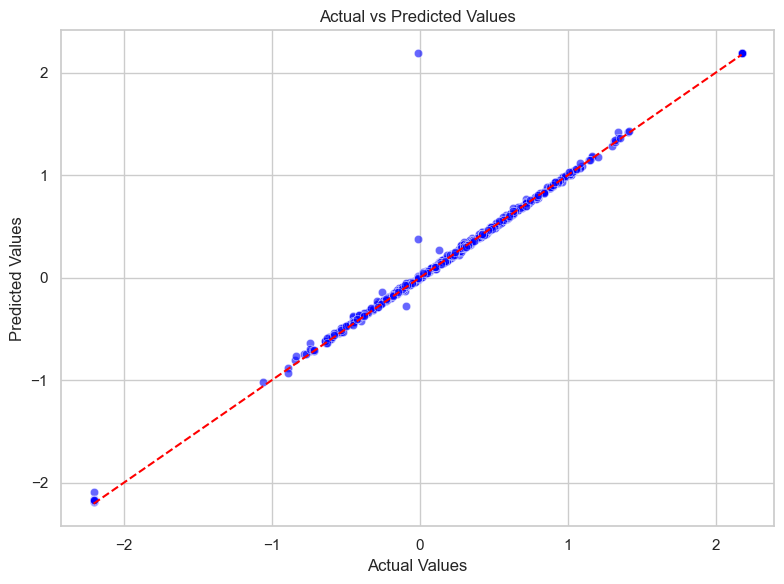

In [38]:
y_test_flat = y_test.flatten() if hasattr(y_test, 'flatten') else y_test
y_pred_flat = y_pred_ann.flatten() if hasattr(y_pred_ann, 'flatten') else y_pred_ann 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='blue', alpha=0.6)
plt.plot([min(y_test_flat), max(y_test_flat)], [min(y_test_flat), max(y_test_flat)], color='red', linestyle='--') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
model.save("regression_model.keras")

In [40]:
# from tensorflow.keras.models import load_model
# model = load_model("regression_model.keras")

In [82]:
import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load trained model
@st.cache_resource
def load_trained_model():
    return load_model("regression_model.keras")

model = load_trained_model()

st.title("Website Data Regression Model")
st.markdown("Upload your website data CSV and get predictions.")

uploaded_file = st.file_uploader("Upload a CSV file", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    st.subheader("Uploaded Data Preview")
    st.write(df.head())

    # Try to drop known non-numeric columns or datetime
    drop_cols = ['DateHour'] if 'DateHour' in df.columns else []
    input_df = df.drop(columns=drop_cols, errors='ignore')

    # Optionally drop target if present
    if 'Sessions' in input_df.columns:
        input_df = input_df.drop(columns=['Sessions'])

    # Preprocessing: ensure only numeric columns
    input_df = input_df.select_dtypes(include=np.number)

    st.subheader("Running Predictions...")
    preds = model.predict(input_df)
    st.write(preds)

    if 'Sessions' in df.columns:
        st.subheader("Model Evaluation (if actual values available)")
        y_true = df['Sessions']
        y_pred = preds.flatten()
        r2 = r2_score(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        st.write(f"**R² Score:** {r2:.4f}")
        st.write(f"**Mean Squared Error:** {mse:.6f}")

        # Plot actual vs predicted
        fig, ax = plt.subplots()
        ax.scatter(y_true, y_pred, alpha=0.6, color='blue')
        ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        ax.set_xlabel("Actual Sessions")
        ax.set_ylabel("Predicted Sessions")
        ax.set_title("Actual vs Predicted Sessions")
        st.pyplot(fig)

    # Allow user to download predictions
    st.subheader("Download Predictions")
    result_df = df.copy()
    result_df['Predicted Sessions'] = preds
    csv = result_df.to_csv(index=False).encode('utf-8')
    st.download_button("Download as CSV", data=csv, file_name="predictions.csv", mime='text/csv')


2025-06-23 11:30:22.014 
  command:

    streamlit run C:\Users\Soham Chouhan\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
